In [1]:
# Baseline model, doing logistic regression on the data
# Import pandas and sklearn

import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, auc, roc_curve
from sklearn.model_selection import train_test_split


/tmp/ipykernel_12926/3531922238.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('data/train.csv')

# Split the data into training and testing data
# X = df.drop(['Exited', 'Surname', 'CustomerId', 'Gender', 'Geography'], axis=1)
df['SurnameLen'] = df['Surname'].apply(lambda x: len(x))
X_raw = df.drop(['Exited', 'Surname', 'CustomerId'], axis=1)

In [3]:
X_raw.describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,SurnameLen
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,6.543179
std,47641.3565,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,2.614270
min,0.0000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,2.000000
25%,41258.2500,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,5.000000
50%,82516.5000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,6.000000
75%,123774.7500,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,8.000000
max,165033.0000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,23.000000


In [4]:
# Exploratory data Analysis

# Check for missing values
X_raw.isnull().sum()




id                 0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
SurnameLen         0
dtype: int64

In [5]:
# Check for unique values
X_raw.nunique()

id                 165034
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
SurnameLen             18
dtype: int64

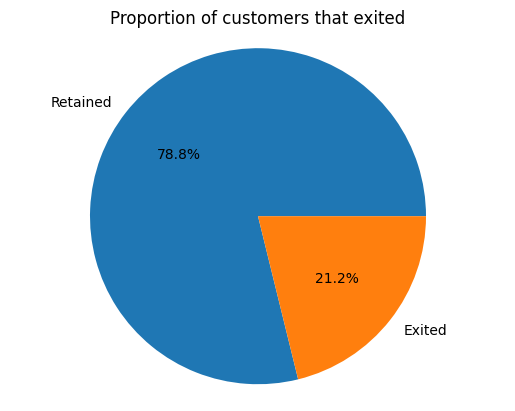

In [6]:

# Check for the distribution of the target variable
df['Exited'].value_counts()

# Plot this in a pie chart using pyplot
import matplotlib.pyplot as plt

labels = 'Retained', 'Exited'
sizes = df['Exited'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Proportion of customers that exited')
plt.show()



<Axes: ylabel='count'>

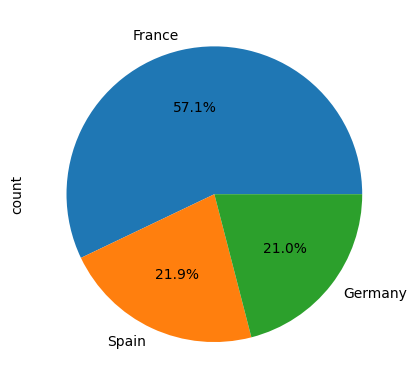

In [7]:
X_raw["Geography"].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define column names for categorical and numeric columns
columns_to_drop = ['CustomerId', 'Surname', 'Id']
categorical_columns = ['Gender', 'Geography']
numeric_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary']

# For exploration only
numeric_columns.append('Exited')

# Create the column preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(categories='auto'), categorical_columns)
    ], remainder='passthrough')

In [9]:
# Apply ColumnTransformer on X_raw, and set it as a dataframe
X = pd.DataFrame(preprocessor.fit_transform(df))

In [10]:
# Rename the columns
# Get the names of the columns
column_names = preprocessor.get_feature_names_out()
X.columns = column_names

In [11]:
X.drop(['remainder__id', 'remainder__Surname'], axis=1, inplace=True)

In [12]:
X = X.convert_dtypes()

In [13]:
X.dtypes

ohe__Gender_Female              Int64
ohe__Gender_Male                Int64
ohe__Geography_France           Int64
ohe__Geography_Germany          Int64
ohe__Geography_Spain            Int64
remainder__CustomerId           Int64
remainder__CreditScore          Int64
remainder__Age                Float64
remainder__Tenure               Int64
remainder__Balance            Float64
remainder__NumOfProducts        Int64
remainder__HasCrCard            Int64
remainder__IsActiveMember       Int64
remainder__EstimatedSalary    Float64
remainder__Exited               Int64
remainder__SurnameLen           Int64
dtype: object

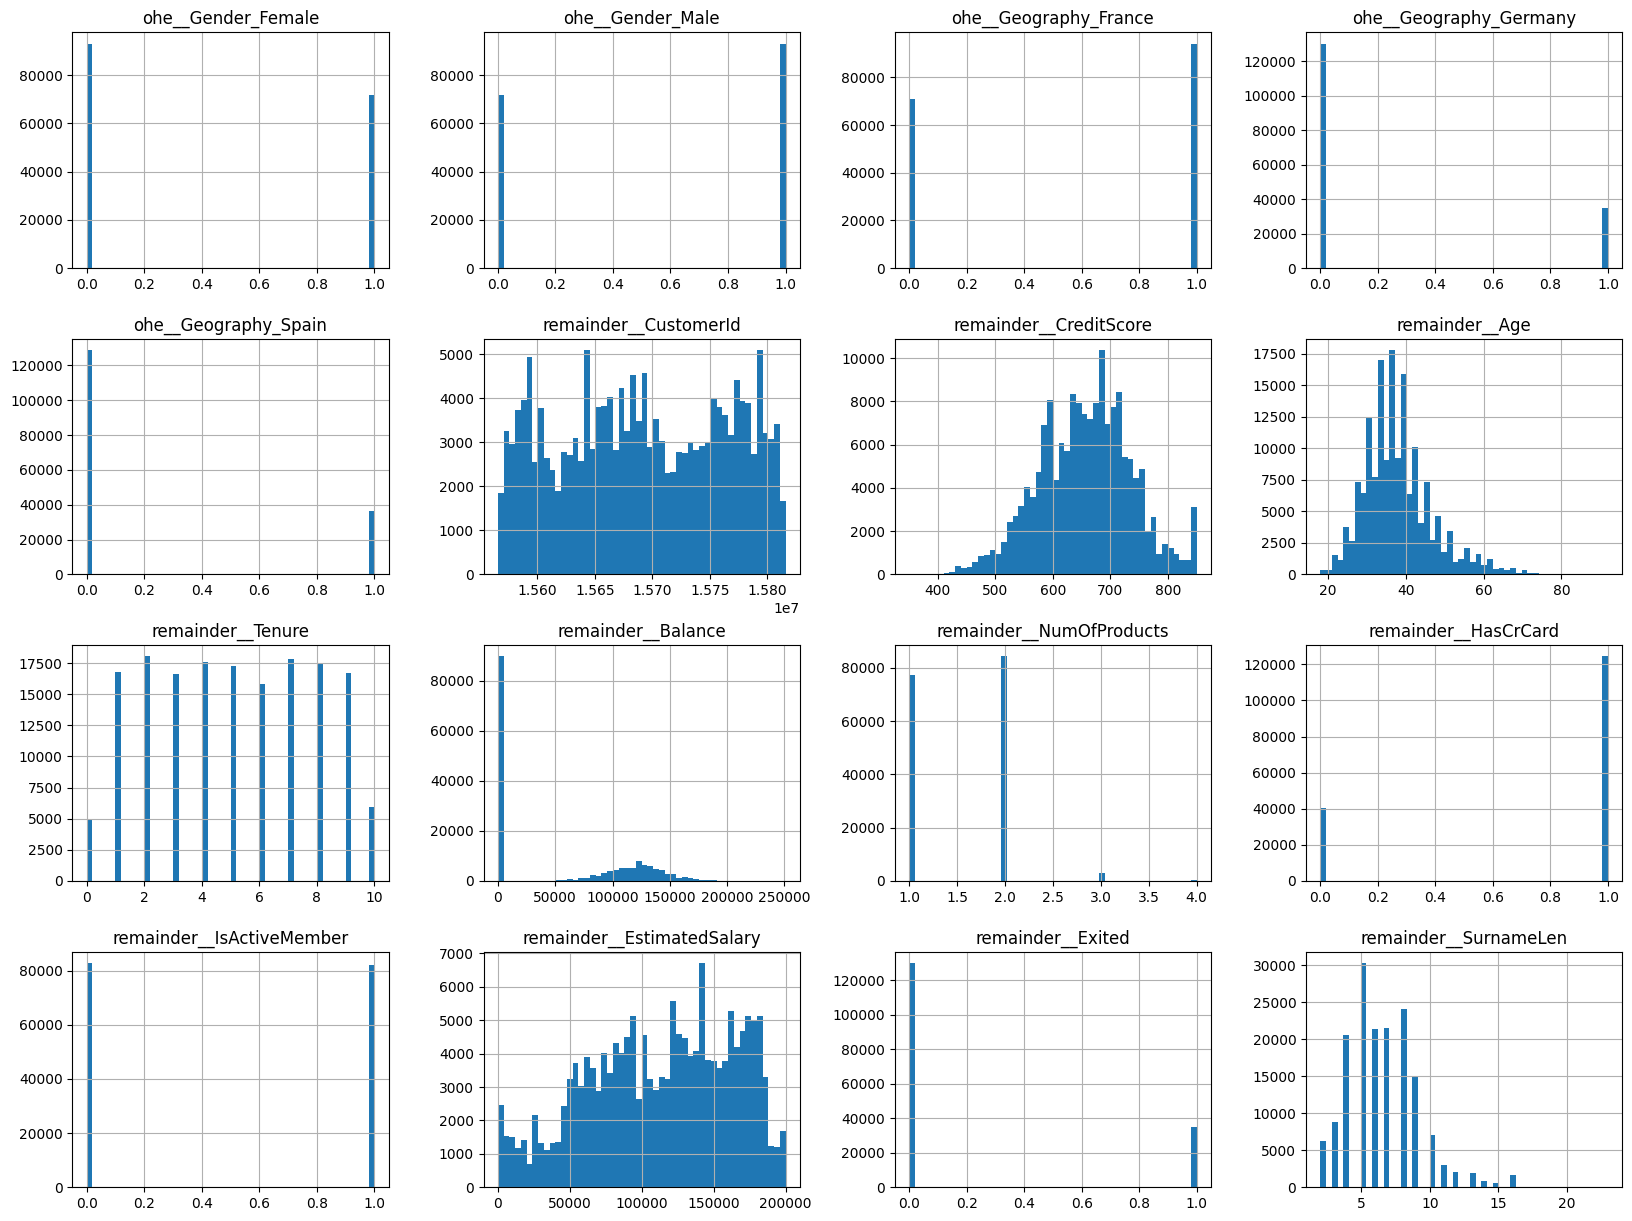

In [14]:
import numpy as np

# Show distributions of numerical variables

# Plot histogram
X.hist(bins=50, figsize=(20, 15))
# X.hist(bins=50, figsize=(20, 15))
plt.show()




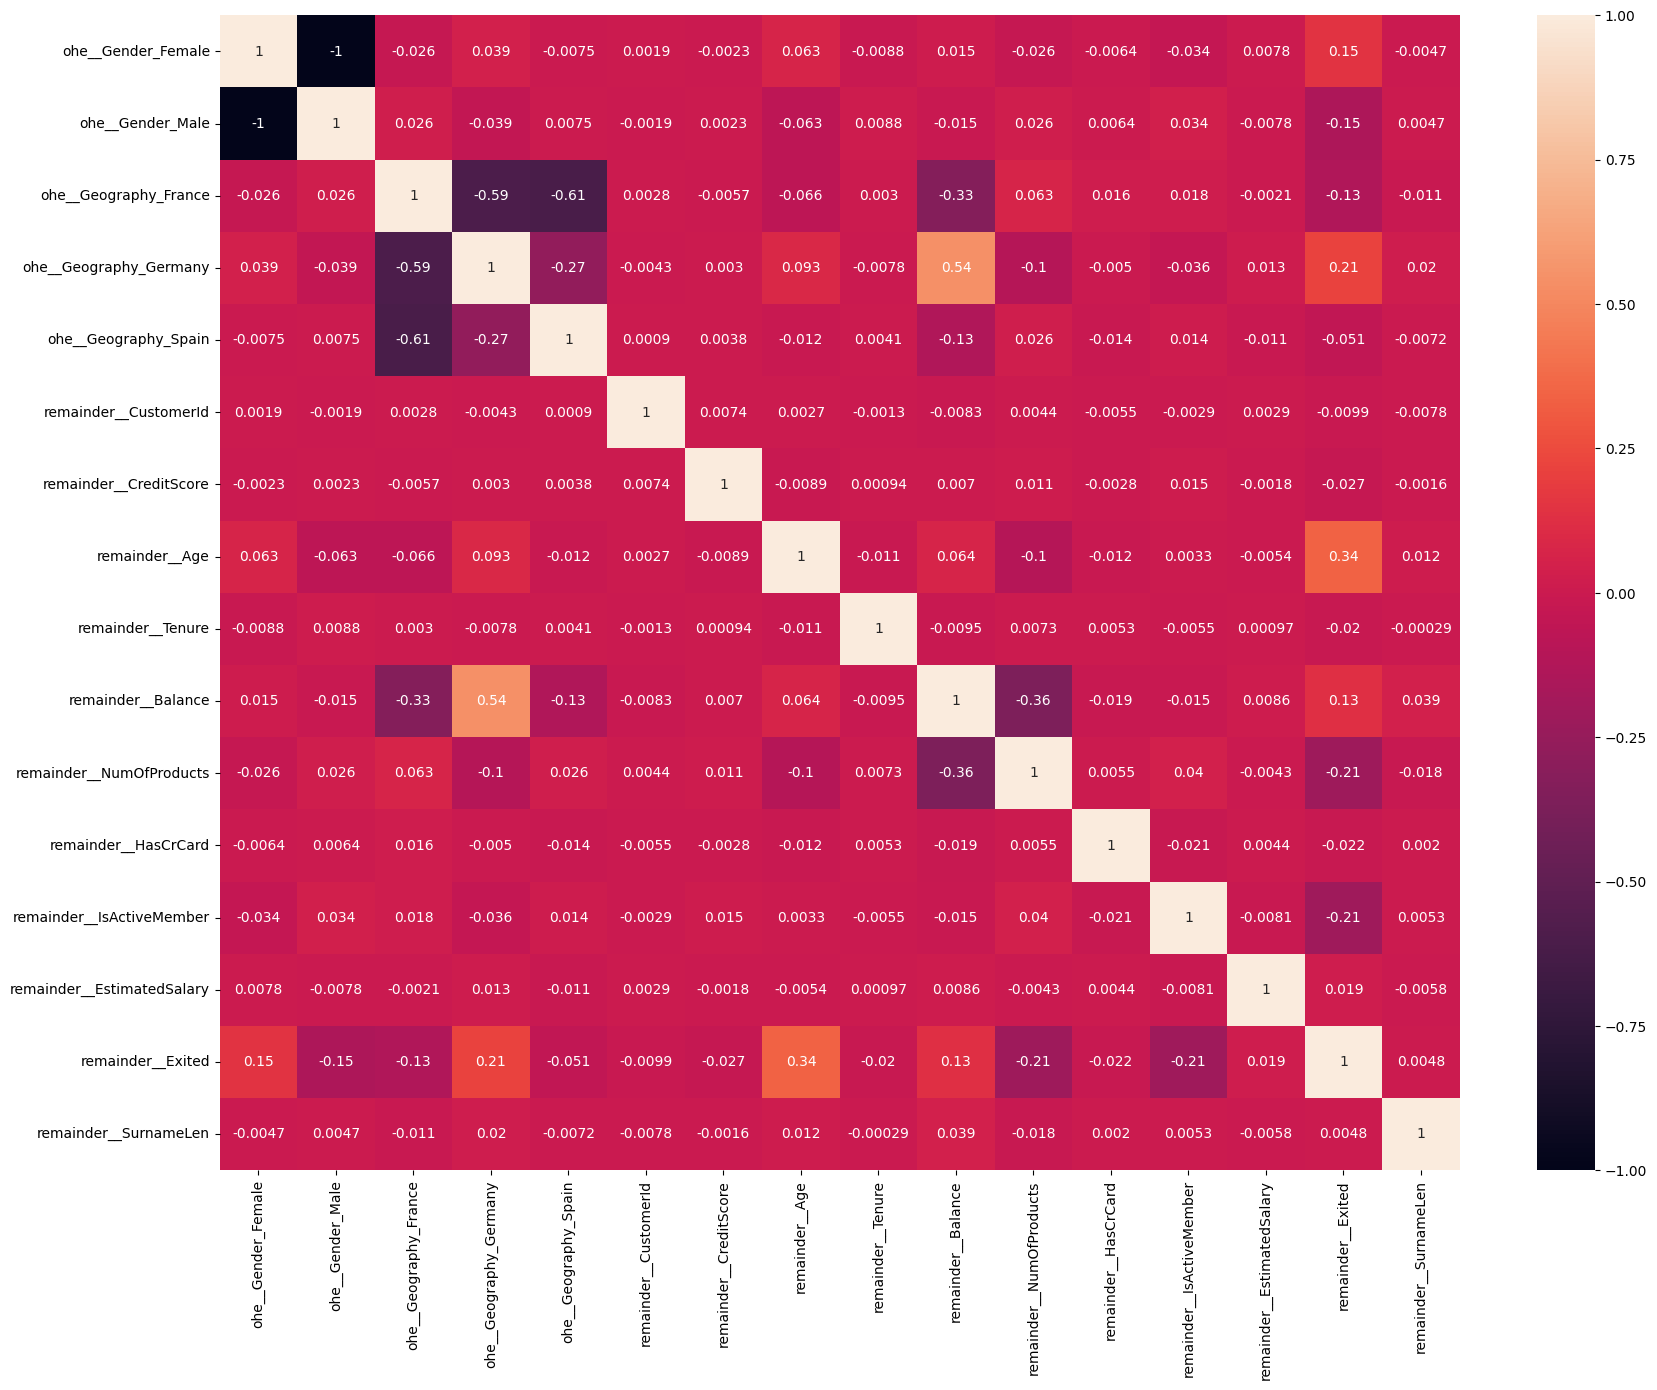

In [16]:
# Check for the correlation between the variables using pyplot

import seaborn as sns

# Select numeric columns from X
numeric_columns = X.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()



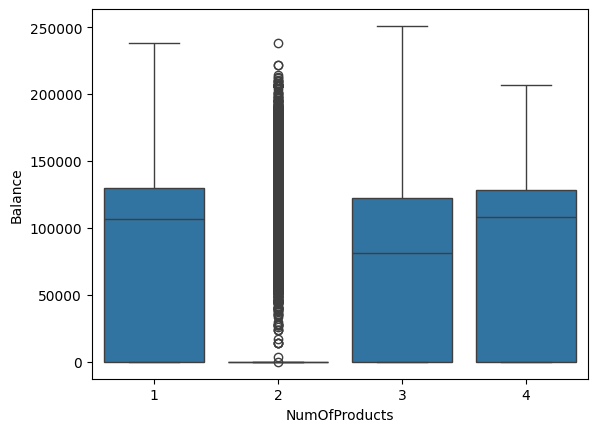

' The -0.36 correlation comes from the fact that a majority of the customers that have 2 \nproducts have a balance of 0 as compared to the other customers like those with 1 product have a proper distribution of balance. \nMost customers have one or two products, that is why data points where customers have 3 or 4 products have a small effect on the correlation.\n'

In [17]:

# Bar and whisker plot Balance vs NumOfProducts

sns.boxplot(x='NumOfProducts', y='Balance', data=X_raw)
plt.show()

""" The -0.36 correlation comes from the fact that a majority of the customers that have 2 
products have a balance of 0 as compared to the other customers like those with 1 product have a proper distribution of balance. 
Most customers have one or two products, that is why data points where customers have 3 or 4 products have a small effect on the correlation.
"""

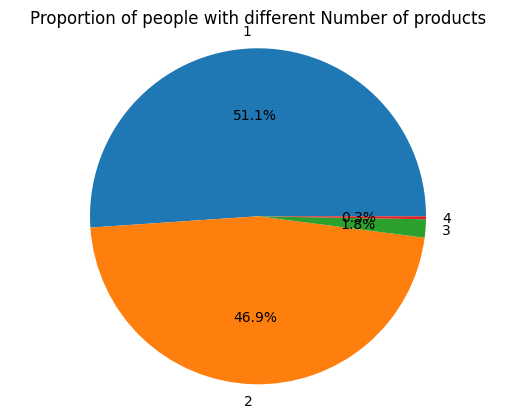

In [18]:
# Make pie chart of number of people with different number of products
labels = '1', '2', '3', '4'
sizes = X_raw['NumOfProducts'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Proportion of people with different Number of products')
plt.show()

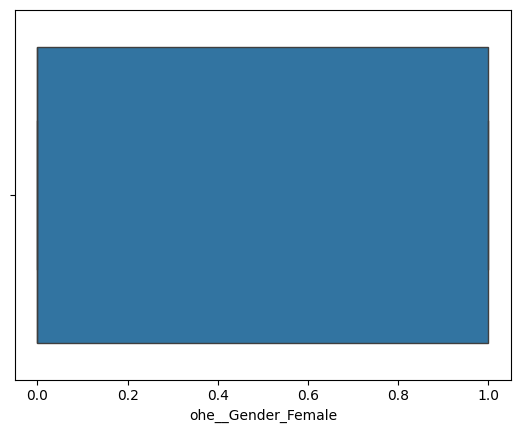

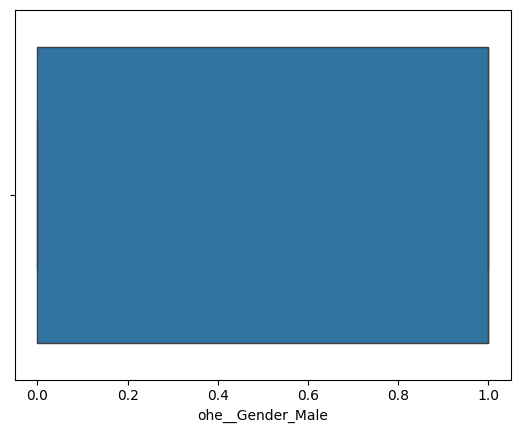

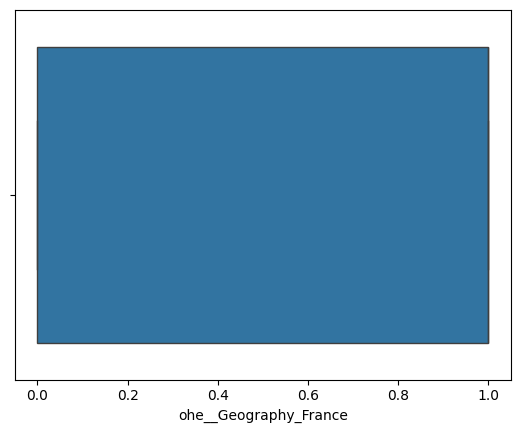

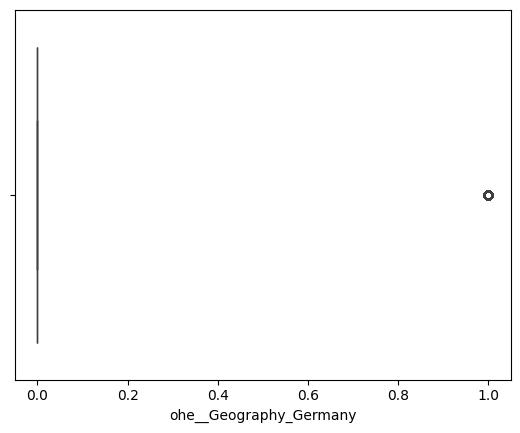

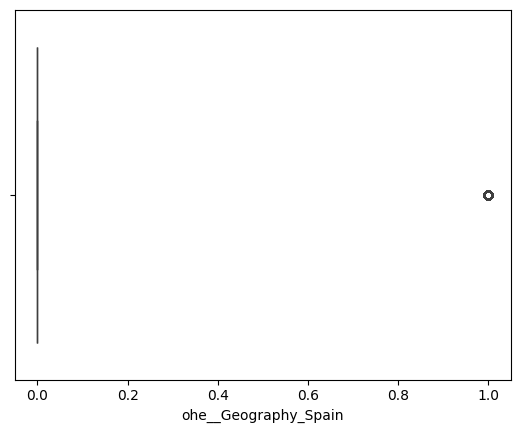

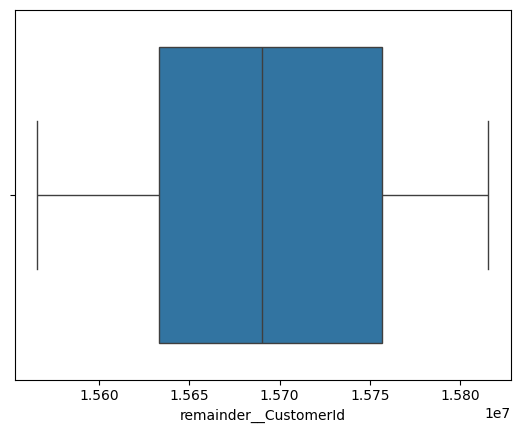

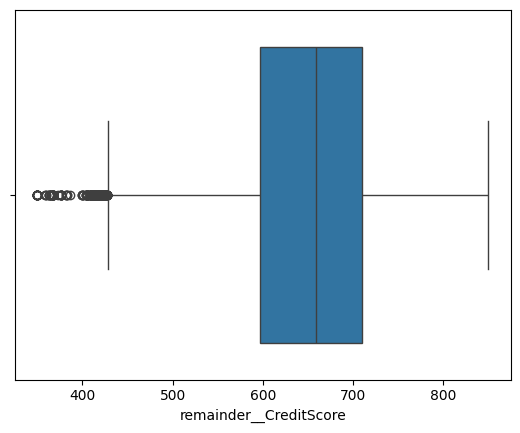

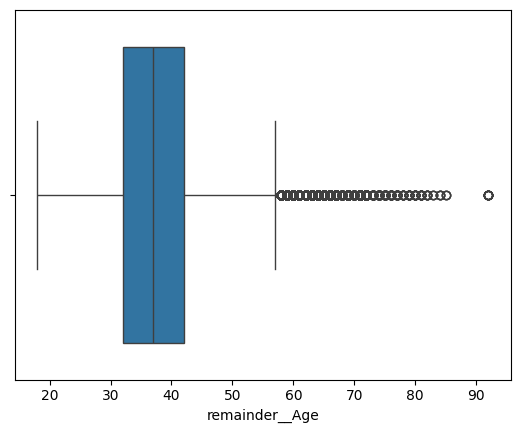

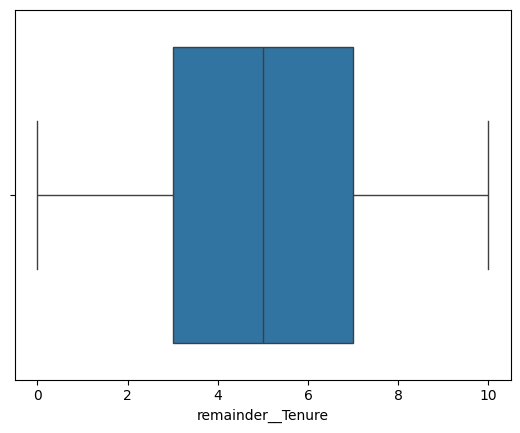

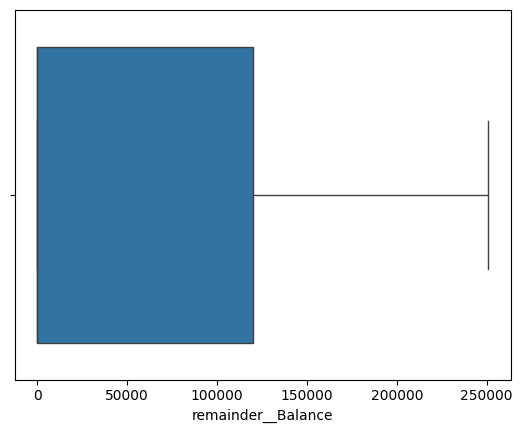

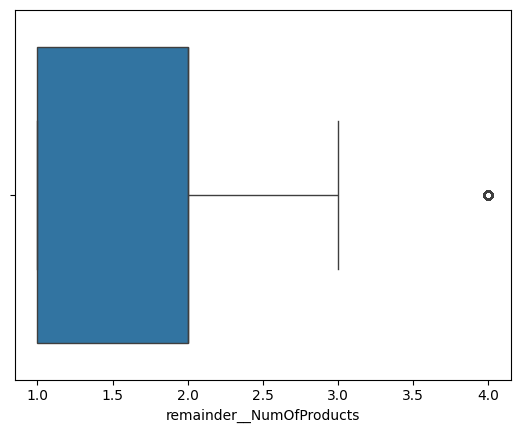

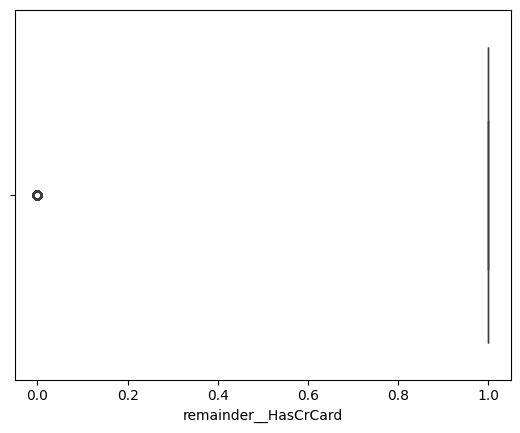

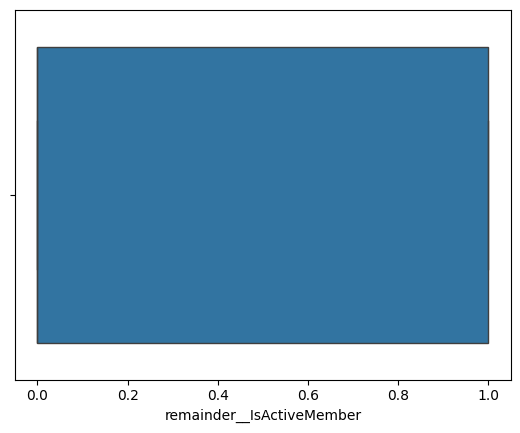

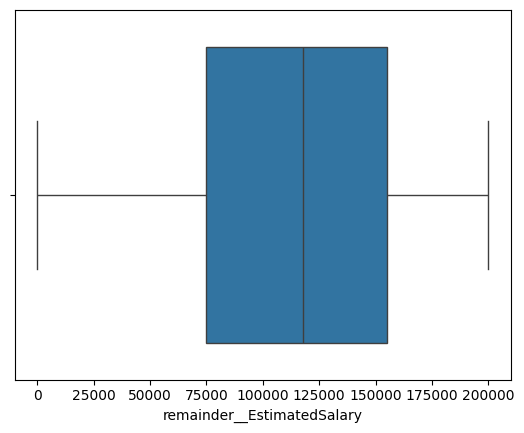

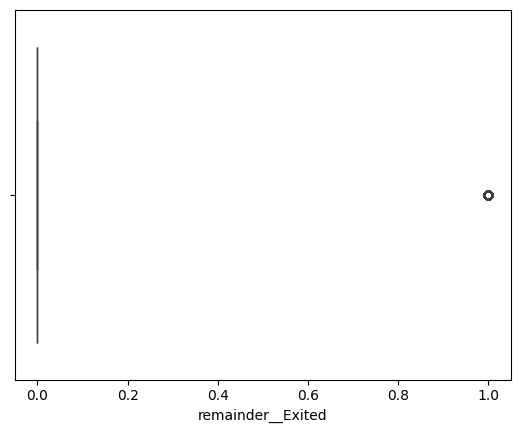

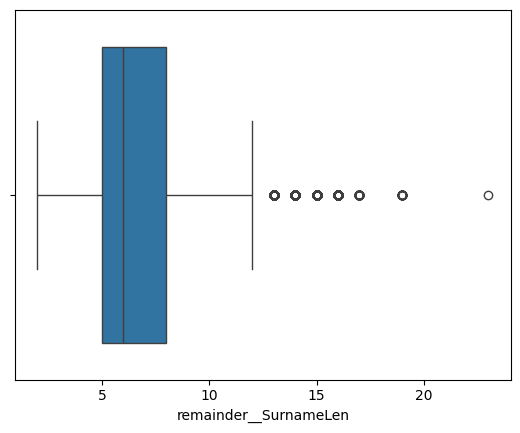

In [19]:
# Let's take a look at outliers
# Box and whisker plot using seaborn for each column
for column in X.columns:
    sns.boxplot(x=X[column])
    plt.show()


# LLM model

In [26]:
# Because an LLM just takes in 1 big string, we need to make that
# let's make another dataset

direct_cols = ['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
               'EstimatedSalary']
boolean_cols = ['HasCrCard', 'IsActiveMember']
target_cols = ['Exited']

bool_col_to_yesno = lambda x: 'Yes' if x else 'No'

llm_df = pd.DataFrame()
llm_df['text'] = 'Determine whether this person will churn out of their bank account:\n' + \
                 'Surname: ' + df['Surname'] + '\n' + \
                 'CreditScore: ' + df['CreditScore'].astype(str) + '\n' + \
                 'Geography: ' + df['Geography'] + '\n' + \
                 'Gender: ' + df['Gender'] + '\n' + \
                 'Age: ' + df['Age'].astype(str) + ' years old \n' + \
                 'Tenure: ' + df['Tenure'].astype(str) + '\n' + \
                 'Balance: ' + df['Balance'].astype(str) + '\n' + \
                 'Number of Products: ' + df['NumOfProducts'].astype(str) + '\n' + \
                 'Estimated Salary: $' + df['EstimatedSalary'].astype(str) + 'k\n' + \
                 'Has Credit card?: ' + df['HasCrCard'].map(bool_col_to_yesno) + '\n' + \
                 'Is Active Member?: ' + df['IsActiveMember'].map(bool_col_to_yesno) + '\n'

llm_df['label'] = df['Exited']

llm_df.to_csv('data/llm_train.csv', index=False)

llm_df



,text,label
0,Determine whether this person will churn out o...,0
1,Determine whether this person will churn out o...,0
2,Determine whether this person will churn out o...,0
3,Determine whether this person will churn out o...,0
4,Determine whether this person will churn out o...,0
...,...,...
165029,Determine whether this person will churn out o...,0
165030,Determine whether this person will churn out o...,0
165031,Determine whether this person will churn out o...,0
165032,Determine whether this person will churn out o...,0


In [22]:
# TODO: use skorch to train the model
# https://nbviewer.org/github/skorch-dev/skorch/blob/master/notebooks/Hugging_Face_Finetuning.ipynb

import numpy as np
import torch
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from skorch import NeuralNetClassifier
from skorch.callbacks import LRScheduler, ProgressBar
from skorch.hf import HuggingfacePretrainedTokenizer
from torch import nn
from torch.optim.lr_scheduler import LambdaLR
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer


In [47]:
# Choose a tokenizer and BERT model that work together
TOKENIZER = "distilbert-base-uncased"
PRETRAINED_MODEL = "distilbert-base-uncased"

# model hyper-parameters
OPTMIZER = torch.optim.AdamW
LR = 5e-5
MAX_EPOCHS = 3
CRITERION = nn.CrossEntropyLoss
BATCH_SIZE = 128

# device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [48]:
dataset = pd.read_csv('data/llm_train.csv')
# Sanity check
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    165034 non-null  object
 1   label   165034 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [49]:
X = dataset['text']
y = dataset['label']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [51]:
X_train[:2]

112149    Determine whether this person will churn out o...
70095     Determine whether this person will churn out o...
Name: text, dtype: object

In [52]:
# Prepare the training
num_training_steps = MAX_EPOCHS * (len(X_train) // BATCH_SIZE + 1)

def lr_schedule(current_step):
    factor = float(num_training_steps - current_step) / float(max(1, num_training_steps))
    assert factor > 0
    return factor

class BertModule(nn.Module):
    def __init__(self, name, num_labels):
        super().__init__()
        self.name = name
        self.num_labels = num_labels
        
        self.reset_weights()
        
    def reset_weights(self):
        self.bert = AutoModelForSequenceClassification.from_pretrained(
            self.name, num_labels=self.num_labels
        )
        
    def forward(self, **kwargs):
        pred = self.bert(**kwargs)
        return pred.logits

In [53]:
pipe = Pipeline([
    ('tokenizer', HuggingfacePretrainedTokenizer(TOKENIZER)),
    ('net', NeuralNetClassifier(
        BertModule,
        module__name=PRETRAINED_MODEL,
        module__num_labels=len(set(y_train)),
        optimizer=OPTMIZER,
        lr=LR,
        max_epochs=MAX_EPOCHS,
        criterion=CRITERION,
        batch_size=BATCH_SIZE,
        iterator_train__shuffle=True,
        device=DEVICE,
        callbacks=[
            LRScheduler(LambdaLR, lr_lambda=lr_schedule, step_every='batch'),
            ProgressBar(),
        ],
    )),
])

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)

In [55]:
%time pipe.fit(X_train, y_train)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1033 [00:00<?, ?it/s]

  epoch    train_loss    valid_acc    valid_loss       dur
-------  ------------  -----------  ------------  --------
      1        0.3540       0.8561        0.3347  536.7652


  0%|          | 0/1033 [00:00<?, ?it/s]

      2        0.3224       0.8634        0.3251  533.4026


  0%|          | 0/1033 [00:00<?, ?it/s]

      3        0.3123       0.8650        0.3223  528.6866
CPU times: user 27min 16s, sys: 1.2 s, total: 27min 17s
Wall time: 26min 51s


Pipeline(steps=[('tokenizer',
                 HuggingfacePretrainedTokenizer(tokenizer='distilbert-base-uncased')),
                ('net',
                 <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=BertModule(
    (bert): DistilBertForSequenceClassification(
      (distilbert): DistilBertModel(
        (embeddings): Embeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddin...
                (lin1): Linear(in_features=768, out_features=3072, bias=True)
                (lin2): Linear(in_features=3072, out_features=768, bias=True)
                (activation): GELUActivation()
              )
              (output_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            )
          )
        )
      )
      (pre_classifier): Linear(in_features=768, out_features=768, bias=True)
      (classifier): Linear(in_features=768, out_features=2, bias=True)
      (dropout): Dropout(p=0.2, inplace=False)
    )
  ),
))])

In [58]:
%%time
# Evaluation

with torch.inference_mode():
    y_pred = pipe.predict(X_test)

CPU times: user 1min 5s, sys: 80 ms, total: 1min 5s
Wall time: 59.3 s


In [59]:
accuracy_score(y_test, y_pred)


0.8665434604780804

Accuracy:  0.8665434604780804
ROC AUC:  0.7495855751051838
Precision/Recall AUC:  0.7495855751051838
Confusion matrix:  [[24783  1240]
 [ 3165  3819]]


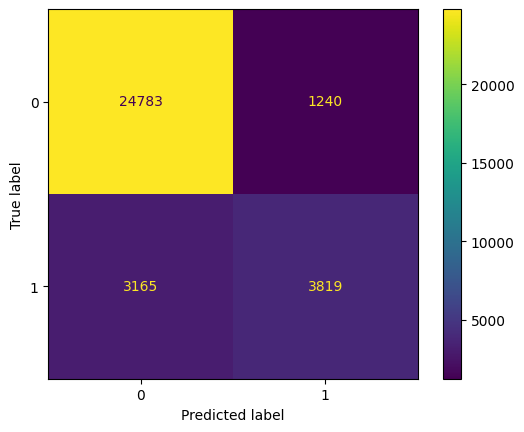

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: ", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
pr_auc = auc(fpr, tpr)
print("Precision/Recall AUC: ", pr_auc)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ", conf_matrix)
conf_plot = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                   display_labels=pipe.classes_)
conf_plot.plot()
plt.show()

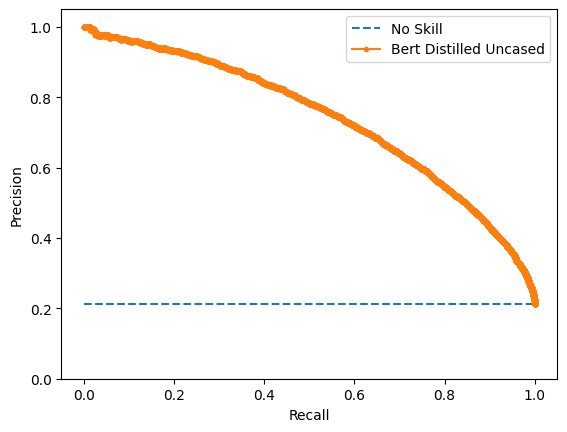

CPU times: user 1min 11s, sys: 216 ms, total: 1min 11s
Wall time: 1min 5s


In [62]:
%%time
# Plot precision recall curves
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# predict probabilities
y_pred_proba = pipe.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = y_pred_proba[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y == 1]) / len(y)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Bert Distilled Uncased')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# Set y to be between 0 and 1
pyplot.ylim([0.0, 1.05])
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

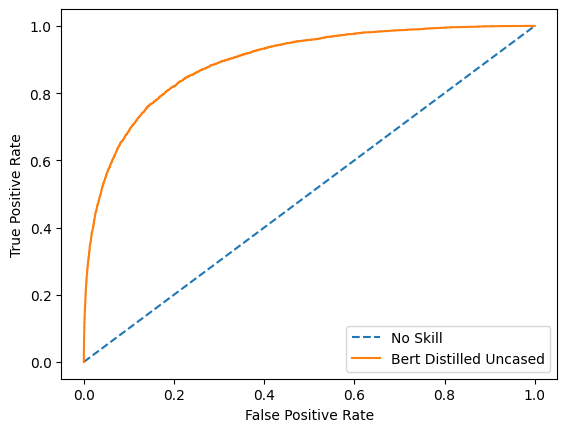

In [63]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# Source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

y_pred_proba = pipe.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = y_pred_proba[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
#  marker='.',
pyplot.plot(fpr, tpr, label='Bert Distilled Uncased')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [65]:
# Save the pipeline to a pickle file
import joblib

joblib.dump(pipe, 'models/distilbert-base-uncased-bank-churn.pkl')


['models/distilbert-base-uncased-bank-churn.pkl']

In [70]:
import getpass
from huggingface_hub import HfApi
# Set up the API
api = HfApi()


api.upload_folder(
    folder_path='models/',
    repo_id='kevin50jiang/MSCI-546-project',
    repo_type='model',
    token=getpass.getpass('Enter your token: '),
)

distilbert-base-uncased-bank-churn.pkl:   0%|          | 0.00/1.61G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kevin50jiang/MSCI-546-project/commit/d753e2cb66dd104cdb82f445da2d3fc9ce7e3199', commit_message='Upload folder using huggingface_hub', commit_description='', oid='d753e2cb66dd104cdb82f445da2d3fc9ce7e3199', pr_url=None, pr_revision=None, pr_num=None)

In [67]:
# api.create_repo(
#     
#     name='MSCI-546-project',
#     token=,
#     repo_type='model'
# )

TypeError: HfApi.create_repo() got an unexpected keyword argument 'name'